<a href="https://colab.research.google.com/github/dorogov/1_typo/blob/master/hometask_dmia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import matplotlib.pyplot as plt
import numpy as np

from numpy.random import seed
from tensorflow import set_random_seed

Using TensorFlow backend.


In [0]:
seed(1)
set_random_seed(2)

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [0]:
class_names = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
               5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

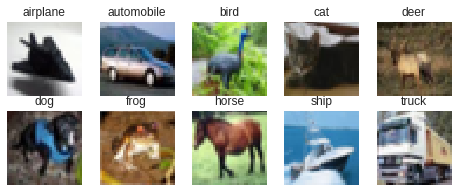

In [5]:
fig = plt.figure(figsize=(8,3))

for i in range(len(class_names)):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    idx = np.where(y_train[:]==i)[0][0]
    image = x_train[idx]
    plt.imshow(image)

plt.show()

In [0]:
from IPython.display import SVG
from sklearn.metrics import accuracy_score
from keras.utils.vis_utils import model_to_dot
from keras.models import Sequential
from keras.layers import (Dense, Conv2D, Activation,
                          Dropout, MaxPooling2D, Flatten)
from keras.optimizers import Adam
from keras.utils import to_categorical

In [0]:
def create_model():
  created_model = Sequential()
  return created_model
def add_blocks_to_model(created_model):
    
    created_model.add(Conv2D(filters=32,
                         kernel_size=(3, 3),
                         padding='same',
                         input_shape=x_train.shape[1:]))
    created_model.add(Activation('relu'))
    created_model.add(Conv2D(filters=32,
                         kernel_size=(3, 3),
                         padding='same'))
    created_model.add(Activation('relu'))
    created_model.add(MaxPooling2D(pool_size=(2, 2)))
    created_model.add(Dropout(rate=0.25))
    
    created_model.add(Conv2D(filters=64,
                         kernel_size=(3, 3),
                         padding='same',
                         input_shape=x_train.shape[1:]))
    created_model.add(Activation('relu'))
    created_model.add(Conv2D(filters=64,
                         kernel_size=(3, 3),
                         padding='same'))
    created_model.add(Activation('relu'))
    created_model.add(MaxPooling2D(pool_size=(2, 2)))
    created_model.add(Dropout(rate=0.25))
    created_model.add(Flatten())
    created_model.add(Dense(units=128))
    created_model.add(Activation('relu'))
    created_model.add(Dropout(0.5))
    created_model.add(Dense(units=10))
    created_model.add(Activation('softmax', name='out'))
    
    return created_model

In [0]:
model = create_model()

In [11]:
model = add_blocks_to_model(model)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
__________

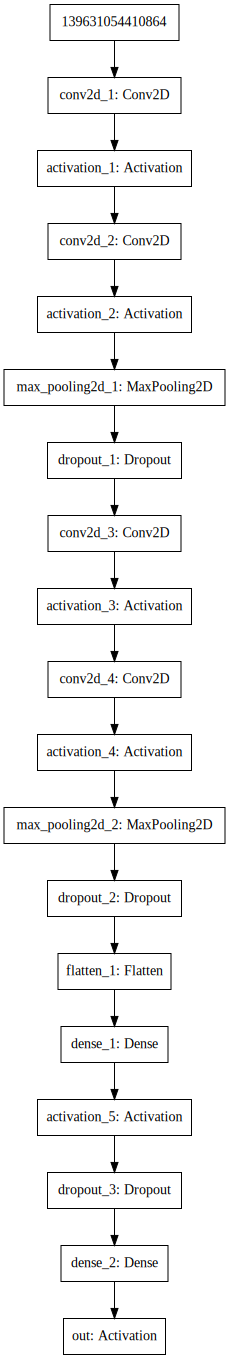

In [13]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [0]:
opt = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [15]:
history = model.fit(
    x=x_train/255.,
    y=to_categorical(y_train, num_classes=10),
    batch_size=32,
    epochs=10,
    validation_data=(x_test/255., to_categorical(y_test, num_classes=10)),
    shuffle=True
)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 25s 498us/step - loss: 1.8542 - acc: 0.3173 - val_loss: 1.4909 - val_acc: 0.4635
Epoch 2/10
50000/50000 [==============================] - 23s 452us/step - loss: 1.5192 - acc: 0.4506 - val_loss: 1.3369 - val_acc: 0.5266
Epoch 3/10
50000/50000 [==============================] - 23s 451us/step - loss: 1.3803 - acc: 0.5059 - val_loss: 1.2028 - val_acc: 0.5749
Epoch 4/10
50000/50000 [==============================] - 23s 450us/step - loss: 1.2904 - acc: 0.5409 - val_loss: 1.1264 - val_acc: 0.6051
Epoch 5/10
50000/50000 [==============================] - 23s 450us/step - loss: 1.2175 - acc: 0.5673 - val_loss: 1.0730 - val_acc: 0.6273
Epoch 6/10
50000/50000 [==============================] - 23s 451us/step - loss: 1.1629 - acc: 0.5887 - val_loss: 1.0299 - val_acc: 0.6410
Epoch 7/10
50000/50000 [==============================] - 23s 452us/

In [16]:
preds_dl_train = model.predict(x_train/255., verbose=1, batch_size=64)
preds_dl_test = model.predict(x_test/255., verbose=1, batch_size=64)

10000/10000 [==============================] - 1s 114us/step


In [17]:
print('CNN train accuracy')
train_acc = accuracy_score(y_train.flatten(),
                           np.argmax(preds_dl_train, axis=1))
print(train_acc)
print('')
print('CNN test accuracy')
test_acc = accuracy_score(y_test.flatten(),
                          np.argmax(preds_dl_test, axis=1))
print(test_acc)

CNN train accuracy
0.71734

CNN test accuracy
0.687


In [20]:
int(0.71734>0.687)

1